## Preprocessing

Load libraries

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

Load the Iris data set. Select two features from the data to use in this
exercise and scale the data.

In [2]:
# Load data
df = pd.read_csv('Iris.csv',index_col=0)

# Select two features
selected_features = ["SepalLengthCm", "PetalLengthCm"]
X = df[selected_features] 

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)


# Print the shape of the scaled data
print("Scaled data shape:", scaled_X.shape)

Scaled data shape: (150, 2)


The StandardScaler we used makes the data have a mean of zero and standard deviation of one and rescales featurers "SepalLengthCm" and "PetalLengthCm" to have values between 0 and 1. Why scale the data?:<br>
* Our original selected features "SepalLengthCm" and "PetalLengthCm" were measured in centimeters and naturally have different ranges.
* Scaling our selected features has helped because now "SepalLengthCm" and "PetalLengthCm" are on comparable scales. This means a machine learning algorithm can treat them with equal importance, preventing either feature from unfairly influencing the model due to differences in their original magnitudes.

Using single and complete linkages, and Euclidean and Cityblock distance metrics, print dendrograms for the different combinations of these. You should have 4 dendrograms.

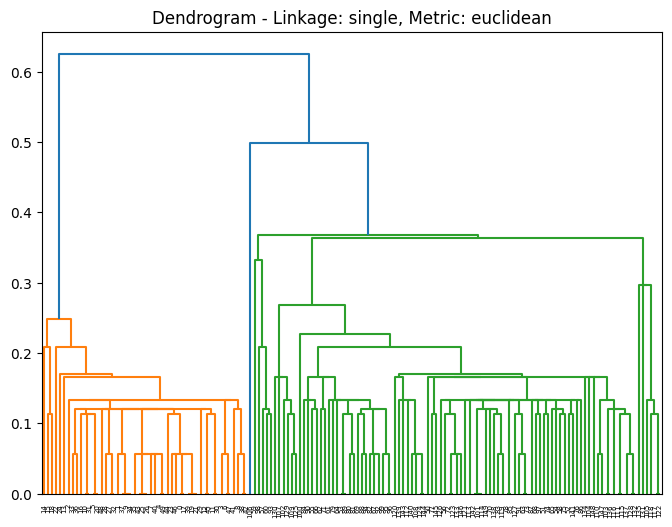

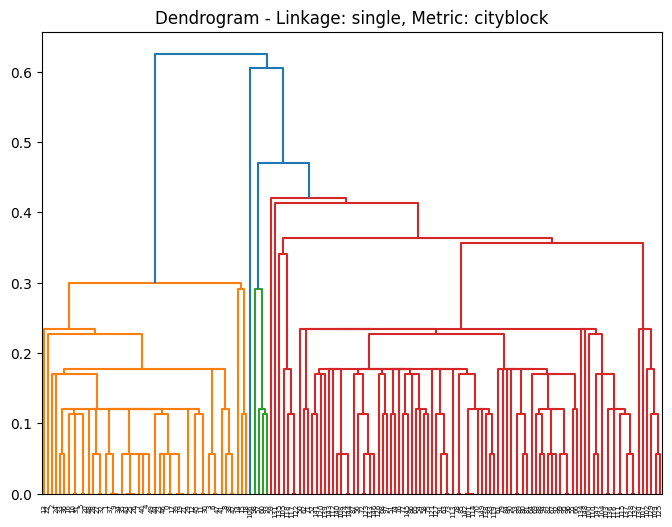

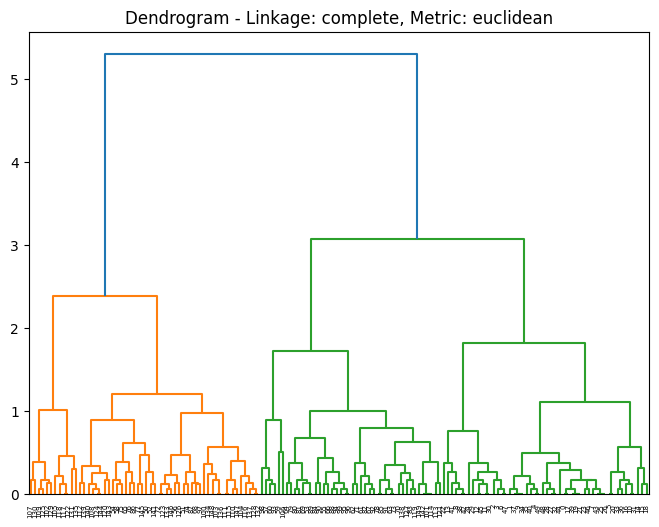

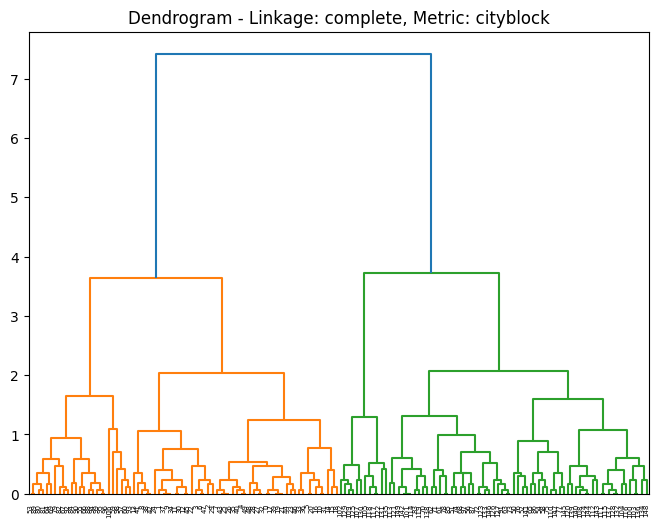

In [3]:
# Define linkage methods and distance metrics
linkage_methods = ["single", "complete"]
distance_metrics = ["euclidean", "cityblock"]

# Generate and plot dendrograms
for linkage_str in linkage_methods:
    for metric in distance_metrics:
        Z = linkage(scaled_X, method=linkage_str, metric=metric)
        plt.figure(figsize=(8, 6))
        plt.title(f"Dendrogram - Linkage: {linkage_str}, Metric: {metric}")
        dendrogram(Z)
        plt.show()

Run agglomerative hierarchical clustering with that number of clusters (and the linkage method and distance metric used for that
dendrogram).

In [4]:
# Define clustering parameters
n_clusters = 2  # Number of clusters chosen
linkage_single = "single"
metric = "euclidean"

# Perform clustering
model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_single, metric=metric)
model.fit(scaled_X)

# Get cluster labels
cluster_labels = model.labels_

# Print cluster labels
print("Cluster labels:", cluster_labels)


Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [5]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette score (for reference)
silhouette_score = silhouette_score(scaled_X, cluster_labels)
print("Silhouette score:", silhouette_score)


Silhouette score: 0.6174310867632291


### Conclusions
There are some limitations to consider looking at the Silhouette score and agglomerative clustering in this scenario.<br>
* Missing centroids: Agglomerative clustering doesn't have explicitly defined centroids like K-Means, making inter-cluster distance calculation for the score less reliable.
* Predefined clusters: The number of clusters (2) was predetermined based on the dendrogram, not necessarily optimized using the score.

While the Silhouette score of 0.617 might indicate some degree of separation between clusters, its reliability is limited due to the aforementioned reasons.
<br>
To increase our confidence, we need some visual analysis like a scatter plot to visually assess the separation between the clusters.

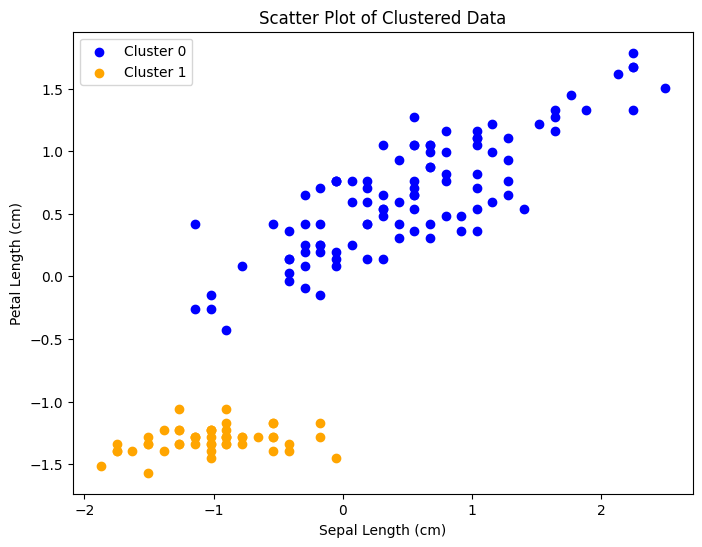

In [6]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(scaled_X[cluster_labels == 0, 0], scaled_X[cluster_labels == 0, 1], label="Cluster 0", color="blue")
plt.scatter(scaled_X[cluster_labels == 1, 0], scaled_X[cluster_labels == 1, 1], label="Cluster 1", color="orange")
plt.title("Scatter Plot of Clustered Data")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.show()

The scatter plot visually confirms the presence of two separate clusters based on the distribution of data points.

Overall, the results suggest that the clustering process has resulted in two reasonably separated clusters in the data and we can be confident abou result of the silhouette score.

In laymen's terms, based on the scatter plot and Silhouette score, the clustering process has found that the different Iris flowers fall into two distinct groups. This means that within each group, the iris flowers are similar to each other in terms of their sepal and petal measurements.